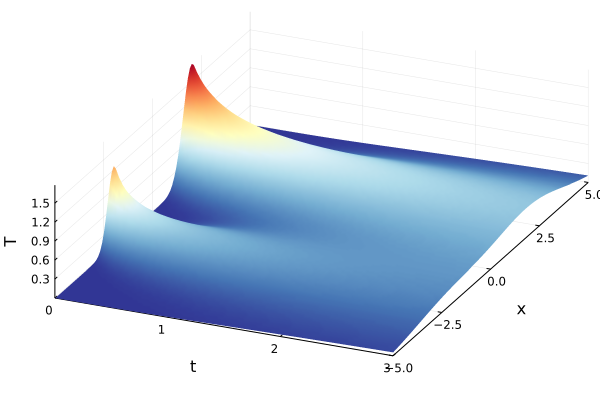

In [1]:
using Plots

f(t, x) = exp(-x^2/(2t))/√(2π*t)
u(t, x) = f(t+0.1, x+2) + 2f(t+0.2, x-2)
t = range(0, 3; length=101)
x = range(-5, 5; length=101)
T = u.(t', x)

surface(t, x, T; colorbar=false,
    xlabel="t", ylabel="x", zlabel="T",
    camera=(30, 70), color=reverse(cgrad(:RdYlBu_11)))

size of matrix(100, 1961)

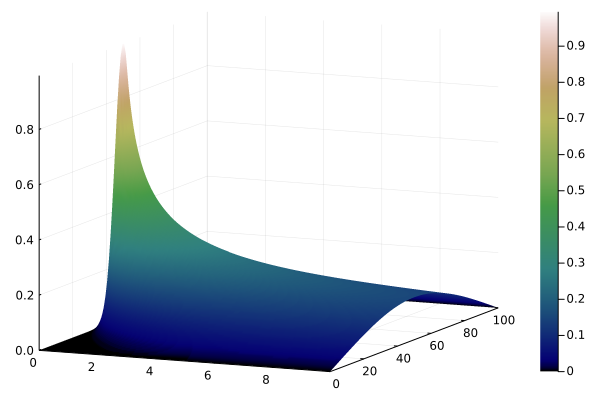

In [2]:
#using LinearAlgebra, SparseArrays, Plots, DifferentialEquations
#using Surrogates
using Plots
#gr()
L=20
N=100
k=50
x=range(0, stop=100, length=100);
dx=x[2]-x[1];
dt=0.5*dx^2/(2*k);
t=0:dt:10
# print("the vlues of t",t)
#T=zeros(length(t),length(x))
T=zeros(length(x),length(t))
s=size(T)
print("size of matrix",s)
#T[1,2]=T[1,1]=100 #complete 1st row
#T[end,end]=150  #last row of a matrix
@. T[:, 1] = exp(-(x-50)^2/(2*5^2))
for j in 1:1960
    for i=2:99
        T[i,j+1]=T[i,j]+k*dt/(dx^2)*(T[i+1,j]-2*T[i,j] + T[i-1,j])
    end
end
surface(t, x, T; color=:gist_earth)

size of matrix(100, 1961)

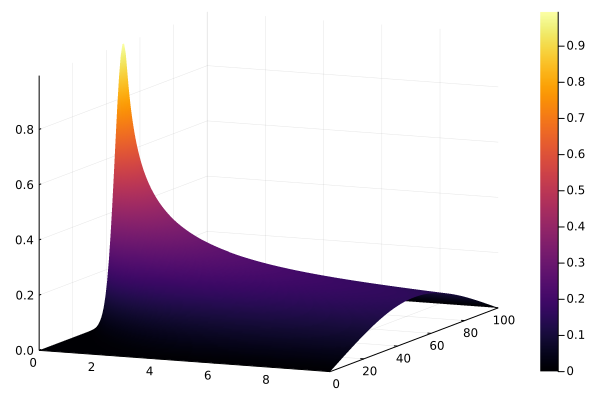

In [3]:
#using LinearAlgebra, SparseArrays, Plots, DifferentialEquations
#using Surrogates
using Plots
#gr()
L=20
N=100
k=50
x=range(0, stop=100, length=100);
dx=x[2]-x[1];
dt=0.5*dx^2/(2*k);
t=0:dt:10
# print("the vlues of t",t)
#T=zeros(length(t),length(x))
T=zeros(length(x),length(t)) # t <--> x
s=size(T)
print("size of matrix",s)
#T[1,2]=T[1,1]=100 #complete 1st row
#T[end,end]=150  #last row of a matrix
@. T[:, 1] = exp(-(x-50)^2/(2*5^2)) # initial values
#for i in 2:1960
for j in 1:1960 # i -> j
#    for j=1:99
    for i=2:99 # j -> i, 1:99 -> 2:99
        T[i,j+1]=T[i,j]+k*dt/(dx^2)*(T[i+1,j]-2*T[i,j] + T[i-1,j])
    end
end
#surface(x,t,T)
surface(t,x,T) # x <--> t

In [4]:
T

100×1961 Matrix{Float64}:
 1.92875e-22  0.0          0.0          …  0.0         0.0         0.0
 1.42487e-21  3.287e-21    7.29587e-21     0.00454643  0.00454579  0.00454515
 1.01054e-20  2.26095e-20  4.94651e-20     0.0090903   0.00908902  0.00908774
 6.88024e-20  1.49354e-19  3.17208e-19     0.0136291   0.0136271   0.0136252
 4.49708e-19  9.47515e-19  1.95434e-18     0.0181601   0.0181575   0.0181549
 2.82184e-18  5.77297e-18  1.15684e-17  …  0.0226808   0.0226775   0.0226742
 1.69985e-17  3.37803e-17  6.57929e-17     0.0271884   0.0271844   0.0271804
 9.83023e-17  1.89838e-16  3.5952e-16      0.0316801   0.0316754   0.0316707
 5.45749e-16  1.02462e-15  1.88762e-15     0.0361531   0.0361477   0.0361423
 2.90869e-15  5.31142e-15  9.52288e-15     0.0406044   0.0405982   0.040592
 1.48825e-14  2.64441e-14  4.61627e-14  …  0.045031    0.045024    0.045017
 7.31025e-14  1.26451e-13  2.15028e-13     0.0494296   0.0494217   0.0494139
 3.44717e-13  5.80765e-13  9.62474e-13     0.0537968   0

T ≈ U = true


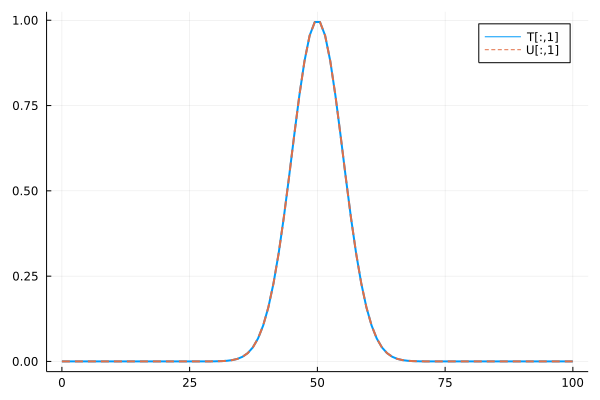

In [5]:
using Plots

k = 50
x = range(0, 100; length=100);
dx = step(x)
dt = 0.5*dx^2/(2k)
t = 0:dt:10
T = zeros(length(x), length(t))
U = zeros(length(x), length(t))

@. T[:, 1] = exp(-(x-50)^2/(2*5^2))

for i in eachindex(x)
    U[i, 1] = exp(-(x[i]-50)^2/(2*5^2))
end

@show T ≈ U

plot(x, T[:, 1]; label="T[:,1]", lw=2)
plot!(x, U[:, 1]; label="U[:,1]", lw=2, ls=:dash)

In [6]:
@show T[:, 1];

T[:, 1] = [1.9287498479639178e-22, 1.4248732922741357e-21, 1.0105367003842286e-20, 6.880237635399095e-20, 4.497076646226533e-19, 2.821841679429488e-18, 1.699849615491783e-17, 9.830234139222472e-17, 5.457487203824977e-16, 2.9086876926565703e-15, 1.488253675492886e-14, 7.310251818545068e-14, 3.4471740712207337e-13, 1.5605209182903019e-12, 6.7819015035157475e-12, 2.8294945691548584e-11, 1.1332918213521915e-10, 4.357627948771011e-10, 1.6085480706635034e-9, 5.7002439684195865e-9, 1.9392256485005528e-8, 6.333426759188449e-8, 1.985750415012094e-7, 5.977038792886579e-7, 1.7271218970923078e-6, 4.7911019177526504e-6, 1.2759196669627972e-5, 3.262021034666134e-5, 8.006186194003403e-5, 0.00018864274960323272, 0.0004267072808030265, 0.0009266068184818457, 0.001931685560178557, 0.003865920139472804, 0.007427537044455158, 0.013699738515325808, 0.02425801345428226, 0.041235730300983486, 0.06729265315745665, 0.10542342367197777, 0.1585557818930971, 0.22892991893252546, 0.3173207912750154, 0.422250338024

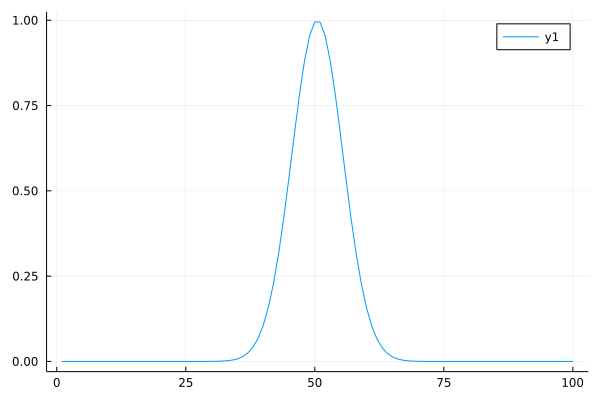

In [7]:
plot(T[:, 1])

In [8]:
?@.

```
@. expr
```

Convert every function call or operator in `expr` into a "dot call" (e.g. convert `f(x)` to `f.(x)`), and convert every assignment in `expr` to a "dot assignment" (e.g. convert `+=` to `.+=`).

If you want to *avoid* adding dots for selected function calls in `expr`, splice those function calls in with `$`.  For example, `@. sqrt(abs($sort(x)))` is equivalent to `sqrt.(abs.(sort(x)))` (no dot for `sort`).

(`@.` is equivalent to a call to `@__dot__`.)

# Examples

```jldoctest
julia> x = 1.0:3.0; y = similar(x);

julia> @. y = x + 3 * sin(x)
3-element Vector{Float64}:
 3.5244129544236893
 4.727892280477045
 3.4233600241796016
```


In [9]:
@show VERSION
using Pkg
Pkg.status("Plots")
Pkg.status("PlotUtils"; mode=PKGMODE_MANIFEST)
Pkg.status("GR"; mode=PKGMODE_MANIFEST)

VERSION = v"1.6.2"
      Status `D:\OneDrive\public\0015\Surrogates\Project.toml`
  [91a5bcdd] Plots v1.20.1
      Status `D:\OneDrive\public\0015\Surrogates\Manifest.toml`
  [995b91a9] PlotUtils v1.0.11
      Status `D:\OneDrive\public\0015\Surrogates\Manifest.toml`
  [28b8d3ca] GR v0.58.1
